In [82]:
import pandas
pandas.options.display.max_columns=999

import sbmlcore

### Adding features

Because this is a notebook for easy of use, one has to set the `filestem` flag to each of `'traintest'`,`'validation-samples'`, `'validation-mutations'`,or `'mic'` and run the notebook each time.

In [83]:
filestem = 'mic'

In [84]:
df2 = pandas.read_csv('data/ds-' + filestem+'-phen.csv')
if 'CONSISTENT_PHENOTYPE' in df2.columns:
    df2.rename(columns={'MUTATION':'mutation', 'CONSISTENT_PHENOTYPE':'phenotype'}, inplace=True)
else:
    df2.rename(columns={'MUTATION':'mutation', 'PHENOTYPE':'phenotype'}, inplace=True)
df2[:3]


,mutation,phenotype,MIC,SOURCE
0,V7G,R,800,CDC
1,D8N,R,800,CDC
2,Q10R,R,800,CDC


In [85]:
dataset = sbmlcore.FeatureDataset(df2, species='M. tuberculosis', gene='pncA')
dataset.df['segid'] = 'A'
dataset.df

,mutation,phenotype,MIC,SOURCE,segid
0,V7G,R,800,CDC,A
1,D8N,R,800,CDC,A
2,Q10R,R,800,CDC,A
3,Q10P,R,>100,EXIT-RIF,A
4,F13C,S,75-100,EXIT-RIF,A
5,C14R,R,>100,EXIT-RIF,A
6,C14G,R,800,CDC,A
7,L19P,R,800,CDC,A
8,I31N,R,>100,EXIT-RIF,A
9,I31S,R,>100,EXIT-RIF,A


### add change in amino acid sidechain volume

In [86]:
features = [sbmlcore.AminoAcidVolumeChange(), sbmlcore.AminoAcidHydropathyChangeKyteDoolittle(), sbmlcore.AminoAcidPiChange(), sbmlcore.AminoAcidMWChange(), sbmlcore.AminoAcidRogovChange()]
dataset.add_feature(features)
dataset.df[:3]

,mutation,phenotype,MIC,SOURCE,segid,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov
0,A134D,R,>100,EXIT-RIF,A,22.5,-5.3,-3.23,44.0,0.029
1,A146E,R,800,CDC,A,49.8,-5.3,-2.78,58.0,-0.033
2,A134V,R,>100,EXIT-RIF,A,51.4,2.4,-0.04,28.0,0.232


### add features measured using STRIDE

In [87]:
dataset = dataset + sbmlcore.Stride('./data/reference/3PL1-PZA.pdb')
dataset.df['secondary_structure_codes'] = pandas.Categorical(dataset.df.secondary_structure, categories=dataset.df.secondary_structure.unique()).codes
dataset.df.drop(columns=['secondary_structure', 'secondary_structure_long', 'B', 'C', 'E', 'G', 'H', 'T'], inplace=True)
dataset.df[:3]

,segid,mutation,phenotype,MIC,SOURCE,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes
0,A,A134D,R,>100,EXIT-RIF,22.5,-5.3,-3.23,44.0,0.029,-105.15,145.28,9.6,2.0,0.0,0
1,A,A134V,R,>100,EXIT-RIF,51.4,2.4,-0.04,28.0,0.232,-105.15,145.28,9.6,2.0,0.0,0
2,A,A146E,R,800,CDC,49.8,-5.3,-2.78,58.0,-0.033,-54.84,-45.54,0.0,2.0,1.0,1


In [88]:
dataset = dataset + sbmlcore.TempFactors('data/reference/3PL1-PZA.pdb')
dataset.df[:5]

/Users/fowler/Library/Python/3.11/lib/python/site-packages/MDAnalysis/topology/PDBParser.py:348: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/Users/fowler/Library/Python/3.11/lib/python/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


,segid,mutation,phenotype,MIC,SOURCE,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor
0,A,V7G,R,800,CDC,-79.9,-4.6,0.01,-42.0,-0.080,-95.63,119.05,0.0,1.0,1.0,3,28.850000
1,A,D8N,R,800,CDC,3.0,0.0,2.64,-1.0,0.329,50.52,45.60,4.6,1.0,1.0,0,22.650000
2,A,Q10P,R,>100,EXIT-RIF,-31.1,1.9,0.65,-31.1,-0.083,-123.78,153.25,0.0,2.0,1.0,5,33.869999
3,A,Q10R,R,800,CDC,29.6,-1.0,5.11,28.0,0.375,-123.78,153.25,0.0,2.0,1.0,5,33.869999
4,A,F13C,S,75-100,EXIT-RIF,-81.4,-0.3,-0.41,-44.0,-0.082,-100.95,3.11,24.5,1.0,1.0,4,35.389999


<Axes: >

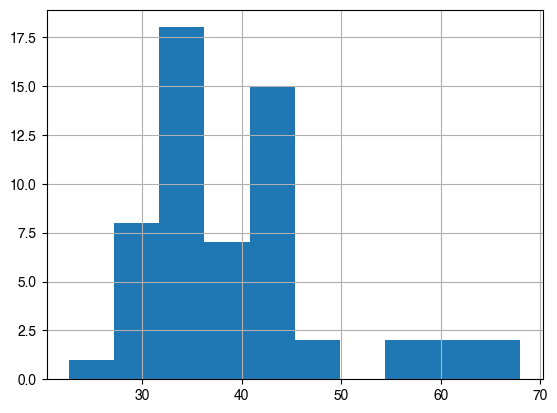

In [89]:
dataset.df.temp_factor.hist()

### add residue depth as measured by BioPython

In [90]:
dataset = dataset + sbmlcore.ResidueDepth('data/reference/3PL1-PZA.pdb', segids=['A'])
dataset.df[:3]

/Users/fowler/Library/Python/3.11/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C6) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.11/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'H' for Atom (name=H6) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.11/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N5) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.11/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C4) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.11/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'H' for Atom (name=H4) with given element ''
  warnings

,segid,mutation,phenotype,MIC,SOURCE,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth
0,A,V7G,R,800,CDC,-79.9,-4.6,0.01,-42.0,-0.080,-95.63,119.05,0.0,1.0,1.0,3,28.850000,7.183138
1,A,D8N,R,800,CDC,3.0,0.0,2.64,-1.0,0.329,50.52,45.60,4.6,1.0,1.0,0,22.650000,5.132194
2,A,Q10P,R,>100,EXIT-RIF,-31.1,1.9,0.65,-31.1,-0.083,-123.78,153.25,0.0,2.0,1.0,5,33.869999,5.090000


### add effect on protein stability as estimated by DeepDDG

In [91]:
dataset = dataset + sbmlcore.DeepDDG('./data/features/3pl1.ddg')
dataset.df.deep_ddG.fillna(value=0, inplace=True)
dataset.df[:3]

,segid,mutation,phenotype,MIC,SOURCE,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG
0,A,V7G,R,800,CDC,-79.9,-4.6,0.01,-42.0,-0.080,-95.63,119.05,0.0,1.0,1.0,3,28.850000,7.183138,-4.330
1,A,D8N,R,800,CDC,3.0,0.0,2.64,-1.0,0.329,50.52,45.60,4.6,1.0,1.0,0,22.650000,5.132194,-1.022
2,A,Q10P,R,>100,EXIT-RIF,-31.1,1.9,0.65,-31.1,-0.083,-123.78,153.25,0.0,2.0,1.0,5,33.869999,5.090000,-2.963


Most mutations are predicted to be destabilising as expected

<Axes: >

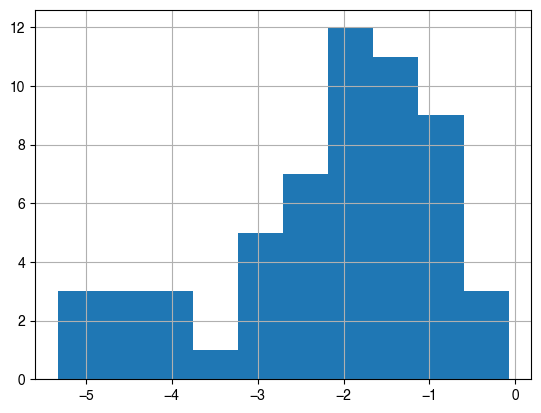

In [92]:
dataset.df.deep_ddG.hist()

### add effect on protein stability estimated by RaSP

In [93]:
dataset = dataset + sbmlcore.RaSP('data/features/cavity_pred_3PL1_A.csv')
dataset.df.drop(columns=['rasp_score_ml_fermi', 'rasp_wt_nlf', 'rasp_mt_nlf'], inplace=True)
dataset.df

,segid,mutation,phenotype,MIC,SOURCE,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_score_ml
0,A,V7G,R,800,CDC,-79.9,-4.6,0.01,-42.0,-0.080,-95.63,119.05,0.0,1.0,1.0,3,28.850000,7.183138,-4.330,4.474436
1,A,D8N,R,800,CDC,3.0,0.0,2.64,-1.0,0.329,50.52,45.60,4.6,1.0,1.0,0,22.650000,5.132194,-1.022,1.974921
2,A,Q10P,R,>100,EXIT-RIF,-31.1,1.9,0.65,-31.1,-0.083,-123.78,153.25,0.0,2.0,1.0,5,33.869999,5.090000,-2.963,4.279662
3,A,Q10R,R,800,CDC,29.6,-1.0,5.11,28.0,0.375,-123.78,153.25,0.0,2.0,1.0,5,33.869999,5.090000,-2.070,1.786195
4,A,F13C,S,75-100,EXIT-RIF,-81.4,-0.3,-0.41,-44.0,-0.082,-100.95,3.11,24.5,1.0,1.0,4,35.389999,3.128169,-2.036,3.320722
5,A,C14G,R,800,CDC,-48.4,-2.9,0.90,-46.1,-0.257,-112.65,171.80,1.2,1.0,2.0,0,41.419998,2.542452,-2.618,1.990933
6,A,C14R,R,>100,EXIT-RIF,64.9,-7.0,5.69,53.0,-0.392,-112.65,171.80,1.2,1.0,2.0,0,41.419998,2.542452,-2.708,1.958140
7,A,L19P,R,800,CDC,-54.0,-5.4,0.32,-16.1,-0.159,-121.26,42.41,27.4,0.0,1.0,0,41.080002,1.970162,-1.477,7.737024
8,A,I31N,R,>100,EXIT-RIF,-52.6,-8.0,-0.61,0.9,-0.124,-67.51,-47.60,0.2,0.0,1.0,1,41.770000,4.544787,-4.891,3.795702
9,A,I31S,R,>100,EXIT-RIF,-77.7,-5.3,-0.34,-26.1,-0.026,-67.51,-47.60,0.2,0.0,1.0,1,41.770000,4.544787,-3.395,4.972542


<Axes: >

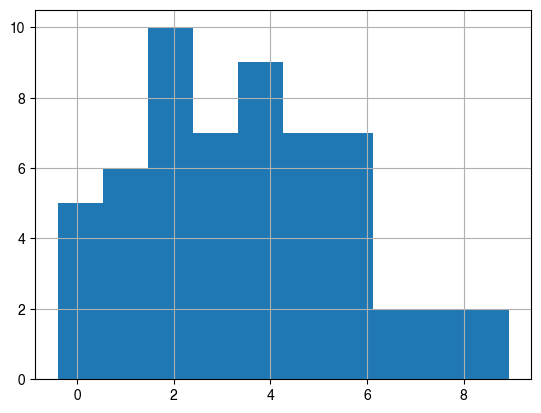

In [94]:
dataset.df.rasp_score_ml.hist()

`SNAP2` scores range from -100 (neutral) to 100 (large effect)

In [95]:
dataset = dataset + sbmlcore.SNAP2('./data/features/3pl1-snap2-with-segids.csv', offsets={'A': 0})
dataset.df.drop(columns=['snap2_accuracy'], inplace=True)
dataset.df

,segid,mutation,phenotype,MIC,SOURCE,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_score_ml,snap2_score
0,A,V7G,R,800,CDC,-79.9,-4.6,0.01,-42.0,-0.080,-95.63,119.05,0.0,1.0,1.0,3,28.850000,7.183138,-4.330,4.474436,86
1,A,D8N,R,800,CDC,3.0,0.0,2.64,-1.0,0.329,50.52,45.60,4.6,1.0,1.0,0,22.650000,5.132194,-1.022,1.974921,92
2,A,Q10P,R,>100,EXIT-RIF,-31.1,1.9,0.65,-31.1,-0.083,-123.78,153.25,0.0,2.0,1.0,5,33.869999,5.090000,-2.963,4.279662,95
3,A,Q10R,R,800,CDC,29.6,-1.0,5.11,28.0,0.375,-123.78,153.25,0.0,2.0,1.0,5,33.869999,5.090000,-2.070,1.786195,94
4,A,F13C,S,75-100,EXIT-RIF,-81.4,-0.3,-0.41,-44.0,-0.082,-100.95,3.11,24.5,1.0,1.0,4,35.389999,3.128169,-2.036,3.320722,79
5,A,C14G,R,800,CDC,-48.4,-2.9,0.90,-46.1,-0.257,-112.65,171.80,1.2,1.0,2.0,0,41.419998,2.542452,-2.618,1.990933,82
6,A,C14R,R,>100,EXIT-RIF,64.9,-7.0,5.69,53.0,-0.392,-112.65,171.80,1.2,1.0,2.0,0,41.419998,2.542452,-2.708,1.958140,81
7,A,L19P,R,800,CDC,-54.0,-5.4,0.32,-16.1,-0.159,-121.26,42.41,27.4,0.0,1.0,0,41.080002,1.970162,-1.477,7.737024,83
8,A,I31N,R,>100,EXIT-RIF,-52.6,-8.0,-0.61,0.9,-0.124,-67.51,-47.60,0.2,0.0,1.0,1,41.770000,4.544787,-4.891,3.795702,73
9,A,I31S,R,>100,EXIT-RIF,-77.7,-5.3,-0.34,-26.1,-0.026,-67.51,-47.60,0.2,0.0,1.0,1,41.770000,4.544787,-3.395,4.972542,60


<Axes: >

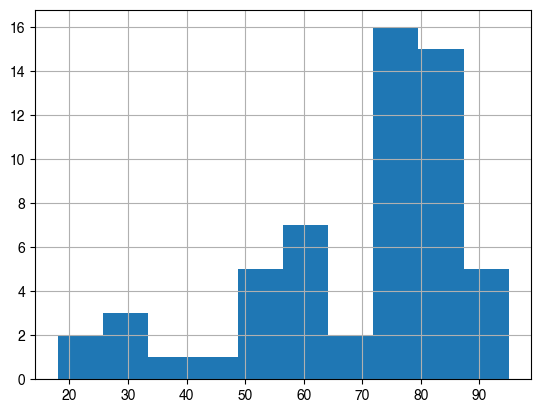

In [96]:
dataset.df.snap2_score.hist()

### add distance from the catalytic Iron 

In [97]:
dataset = dataset + sbmlcore.StructuralDistances('data/reference/3PL1-PZA.pdb', 'resname FE2', 'dist_FE2')
dataset.df[:3]

/Users/fowler/Library/Python/3.11/lib/python/site-packages/MDAnalysis/topology/PDBParser.py:348: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/Users/fowler/Library/Python/3.11/lib/python/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


,segid,mutation,phenotype,MIC,SOURCE,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_score_ml,snap2_score,dist_FE2
0,A,V7G,R,800,CDC,-79.9,-4.6,0.01,-42.0,-0.080,-95.63,119.05,0.0,1.0,1.0,3,28.850000,7.183138,-4.330,4.474436,86,12.532906
1,A,D8N,R,800,CDC,3.0,0.0,2.64,-1.0,0.329,50.52,45.60,4.6,1.0,1.0,0,22.650000,5.132194,-1.022,1.974921,92,9.884244
2,A,Q10P,R,>100,EXIT-RIF,-31.1,1.9,0.65,-31.1,-0.083,-123.78,153.25,0.0,2.0,1.0,5,33.869999,5.090000,-2.963,4.279662,95,11.405717


### add distance from the bound pyrazinamide

In [98]:
dataset = dataset + sbmlcore.StructuralDistances('data/reference/3PL1-PZA.pdb', 'resname PZA', 'dist_PZA', infer_masses=False)
dataset.df[:3]

/Users/fowler/Library/Python/3.11/lib/python/site-packages/MDAnalysis/topology/PDBParser.py:348: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/Users/fowler/Library/Python/3.11/lib/python/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


,segid,mutation,phenotype,MIC,SOURCE,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_score_ml,snap2_score,dist_FE2,dist_PZA
0,A,V7G,R,800,CDC,-79.9,-4.6,0.01,-42.0,-0.080,-95.63,119.05,0.0,1.0,1.0,3,28.850000,7.183138,-4.330,4.474436,86,12.532906,9.296883
1,A,D8N,R,800,CDC,3.0,0.0,2.64,-1.0,0.329,50.52,45.60,4.6,1.0,1.0,0,22.650000,5.132194,-1.022,1.974921,92,9.884244,7.155395
2,A,Q10P,R,>100,EXIT-RIF,-31.1,1.9,0.65,-31.1,-0.083,-123.78,153.25,0.0,2.0,1.0,5,33.869999,5.090000,-2.963,4.279662,95,11.405717,9.712707


### add mCSM predicted stability scores

In [99]:
 # add mCSM stability
df = pandas.read_csv('data/features/3pl1-mcsm_stability.txt', sep='\t')

def create_mutation(row):
    return row['WILD_RES']+str(row.RES_POS)+row['MUT_RES']

df['mutation'] = df.apply(create_mutation, axis=1)
df = df[['mutation','RSA','PRED_DDG']]
df.rename(columns={'RSA': 'mcsm_stability_rsa', 'PRED_DDG': 'mcsm_stability_ddG'}, inplace=True)
df.set_index('mutation', inplace=True)
df
dataset.df.set_index('mutation', inplace=True)
dataset.df = dataset.df.join(df,how='left')
dataset.df.reset_index(inplace=True)
dataset.df[:3]

,mutation,segid,phenotype,MIC,SOURCE,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_score_ml,snap2_score,dist_FE2,dist_PZA,mcsm_stability_rsa,mcsm_stability_ddG
0,V7G,A,R,800,CDC,-79.9,-4.6,0.01,-42.0,-0.080,-95.63,119.05,0.0,1.0,1.0,3,28.850000,7.183138,-4.330,4.474436,86,12.532906,9.296883,0.0,-2.590
1,D8N,A,R,800,CDC,3.0,0.0,2.64,-1.0,0.329,50.52,45.60,4.6,1.0,1.0,0,22.650000,5.132194,-1.022,1.974921,92,9.884244,7.155395,0.0,-1.661
2,Q10P,A,R,>100,EXIT-RIF,-31.1,1.9,0.65,-31.1,-0.083,-123.78,153.25,0.0,2.0,1.0,5,33.869999,5.090000,-2.963,4.279662,95,11.405717,9.712707,0.0,-0.405


<Axes: >

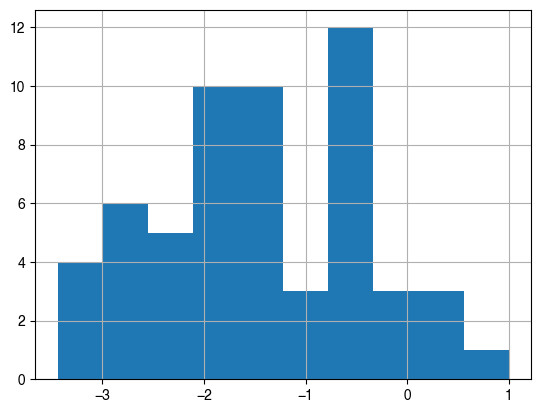

In [100]:
dataset.df.mcsm_stability_ddG.hist()

### add MAPP scores

In [101]:
df = pandas.read_csv('data/features/3pl1-mapp_scores.csv')
df2 = pandas.melt(df, id_vars='Position',value_vars=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'])
df2.rename(columns={'Position': 'codon', 'variable': 'alt_amino_acid', 'value': 'mapp_score'}, inplace=True)
df2.set_index(['codon', 'alt_amino_acid'], inplace=True)

def split_mutation(row):
    return pandas.Series([int(row.mutation[1:-1]), row.mutation[-1]])

df2

dataset.df[['codon', 'alt_amino_acid']] = dataset.df.apply(split_mutation, axis=1)
dataset.df.set_index(['codon', 'alt_amino_acid'], inplace=True)
dataset.df = dataset.df.join(df2,how='left')
dataset.df.reset_index(inplace=True)
dataset.df.drop(columns=['codon', 'alt_amino_acid'], inplace=True)
dataset.df[:3]


,mutation,segid,phenotype,MIC,SOURCE,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_score_ml,snap2_score,dist_FE2,dist_PZA,mcsm_stability_rsa,mcsm_stability_ddG,mapp_score
0,V7G,A,R,800,CDC,-79.9,-4.6,0.01,-42.0,-0.080,-95.63,119.05,0.0,1.0,1.0,3,28.850000,7.183138,-4.330,4.474436,86,12.532906,9.296883,0.0,-2.590,14.68
1,D8N,A,R,800,CDC,3.0,0.0,2.64,-1.0,0.329,50.52,45.60,4.6,1.0,1.0,0,22.650000,5.132194,-1.022,1.974921,92,9.884244,7.155395,0.0,-1.661,13.97
2,Q10P,A,R,>100,EXIT-RIF,-31.1,1.9,0.65,-31.1,-0.083,-123.78,153.25,0.0,2.0,1.0,5,33.869999,5.090000,-2.963,4.279662,95,11.405717,9.712707,0.0,-0.405,42.86


`MAPP` scores range from low (low impact) to high (high impact)

<Axes: >

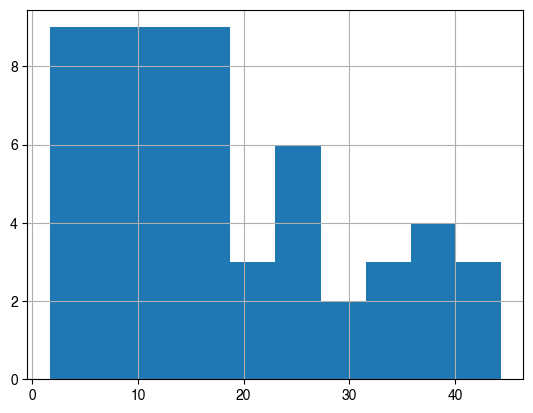

In [102]:
dataset.df.mapp_score.hist()

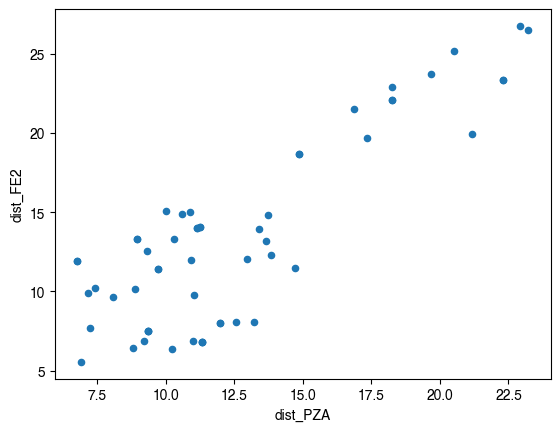

In [103]:
axes = dataset.df.plot.scatter(x='dist_PZA', y='dist_FE2')

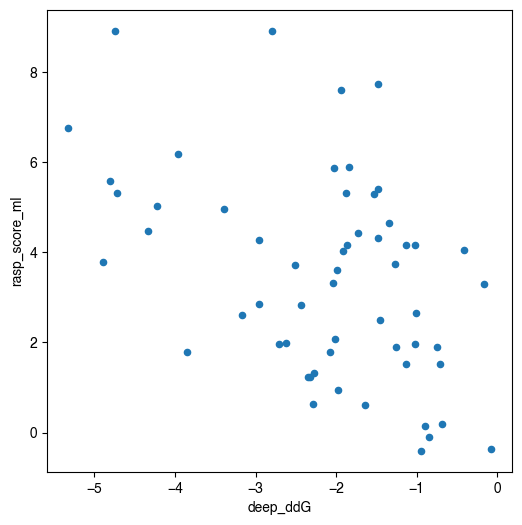

In [104]:
axes = dataset.df.plot.scatter(x='deep_ddG', y='rasp_score_ml', figsize=(6,6))

In [105]:
dataset.df.to_csv('data/ds-'+filestem+'-phen-features.csv', index=False)

In [106]:
dataset.df.set_index('mutation', inplace=True)
dataset.df

,segid,phenotype,MIC,SOURCE,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_score_ml,snap2_score,dist_FE2,dist_PZA,mcsm_stability_rsa,mcsm_stability_ddG,mapp_score
mutation,,,,,,,,,,,,,,,,,,,,,,,,,
V7G,A,R,800,CDC,-79.9,-4.6,0.01,-42.0,-0.080,-95.63,119.05,0.0,1.0,1.0,3,28.850000,7.183138,-4.330,4.474436,86,12.532906,9.296883,0.0,-2.590,14.68
D8N,A,R,800,CDC,3.0,0.0,2.64,-1.0,0.329,50.52,45.60,4.6,1.0,1.0,0,22.650000,5.132194,-1.022,1.974921,92,9.884244,7.155395,0.0,-1.661,13.97
Q10P,A,R,>100,EXIT-RIF,-31.1,1.9,0.65,-31.1,-0.083,-123.78,153.25,0.0,2.0,1.0,5,33.869999,5.090000,-2.963,4.279662,95,11.405717,9.712707,0.0,-0.405,42.86
Q10R,A,R,800,CDC,29.6,-1.0,5.11,28.0,0.375,-123.78,153.25,0.0,2.0,1.0,5,33.869999,5.090000,-2.070,1.786195,94,11.405717,9.712707,0.0,-1.244,23.86
F13C,A,S,75-100,EXIT-RIF,-81.4,-0.3,-0.41,-44.0,-0.082,-100.95,3.11,24.5,1.0,1.0,4,35.389999,3.128169,-2.036,3.320722,79,10.214501,7.411745,2.3,-2.776,17.91
C14G,A,R,800,CDC,-48.4,-2.9,0.90,-46.1,-0.257,-112.65,171.80,1.2,1.0,2.0,0,41.419998,2.542452,-2.618,1.990933,82,14.032423,11.136573,1.4,-0.486,4.42
C14R,A,R,>100,EXIT-RIF,64.9,-7.0,5.69,53.0,-0.392,-112.65,171.80,1.2,1.0,2.0,0,41.419998,2.542452,-2.708,1.958140,81,14.032423,11.136573,1.4,-0.440,24.35
L19P,A,R,800,CDC,-54.0,-5.4,0.32,-16.1,-0.159,-121.26,42.41,27.4,0.0,1.0,0,41.080002,1.970162,-1.477,7.737024,83,9.680556,8.067643,13.3,-1.421,27.08
I31N,A,R,>100,EXIT-RIF,-52.6,-8.0,-0.61,0.9,-0.124,-67.51,-47.60,0.2,0.0,1.0,1,41.770000,4.544787,-4.891,3.795702,73,22.048579,18.237240,0.1,-2.560,12.70
